# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

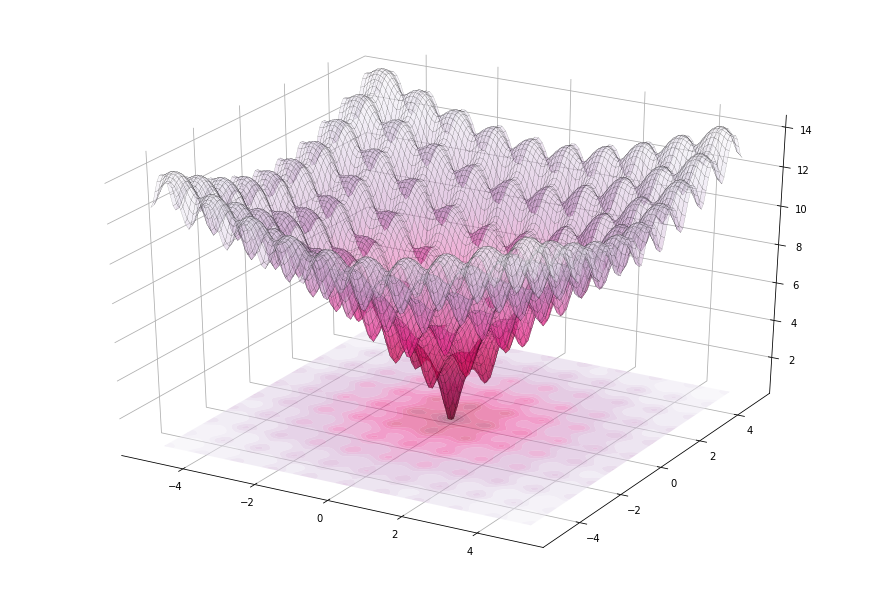

In [1]:
from yabox.problems import Ackley
Ackley().plot3d()

In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

In [4]:
bounds = [(-10, 10), (-10, 10)]

In [5]:
differential_evolution(ackley, bounds, seed=42)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [6]:
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 
                 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 
                 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

de_stratagy = {}
for s in range(0,len(strategies)):
    strategy = strategies[s]
    de = differential_evolution(ackley, bounds, strategy=strategy, seed=42)
    if list(de.x) == list(np.array([0., 0.])):
        de_stratagy[strategy] = de.nfev
stratagy = min(de_stratagy, key=de_stratagy.get)


de_popsize = {}
for popsize in range(1,20):
    de = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, seed=42)
    if list(de.x) == list(np.array([0., 0.])):
        de_popsize[popsize] = de.nfev
popsize = min(de_popsize, key=de_popsize.get)


de_tol = {}
for tol in np.arange(1e-6,0.1,0.01):
    dif_ev = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, tol=tol, seed=42)
    if list(de.x) == list(np.array([0., 0.])):
        de_tol[tol] = de.nfev
tol = min(de_tol, key=de_tol.get)


de_mutation = {}
for mutation in np.arange(0.4,1,0.1):
    de = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, tol=tol, mutation=mutation, seed=42)
    if list(de.x) == list(np.array([0., 0.])):
        de_mutation[mutation] = de.nfev
mutation = min(de_mutation, key=de_mutation.get)


de_recombination = {}
for recombination in np.arange(0,1, 0.1):
    de = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, tol=tol, mutation=mutation, recombination=recombination, seed=42)
    if list(de.x) == list(np.array([0., 0.])):
        de_recombination[recombination] = de.nfev
recombination = min(de_recombination, key=de_recombination.get)


updating_list = ['immediate', 'deferred']
de_updating = {}
for u in range(2):
    updating = updating_list[u]
    de = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, tol=tol, mutation=mutation, recombination=recombination, seed=42, updating=updating)
    if list(de.x) == list(np.array([0., 0.])):
        de_updating[updating] = de.nfev
updating = min(de_updating, key=de_updating.get)

differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, tol=tol, mutation=mutation, recombination=recombination, seed=42, updating=updating)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1283
     nit: 121
 success: True
       x: array([0., 0.])

In [7]:
stratagy_ = pd.DataFrame(de_stratagy, index=[0])
stratagy_

,best1bin,best1exp,rand1exp,randtobest1exp,currenttobest1exp,best2exp,rand2exp,randtobest1bin,currenttobest1bin,best2bin,rand2bin,rand1bin
0,2793,4503,7473,4773,30093,7413,10323,3123,30093,5073,7053,5133


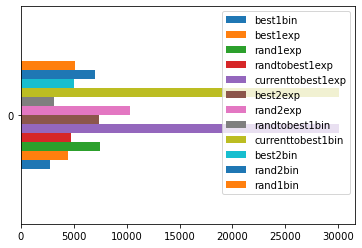

In [8]:
stratagy_.plot.barh()

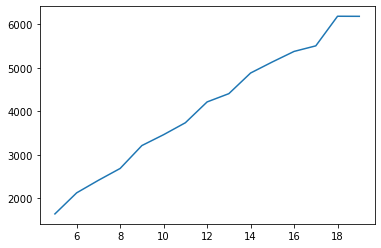

In [9]:
popsize_ = pd.Series(de_popsize)
popsize_.plot()

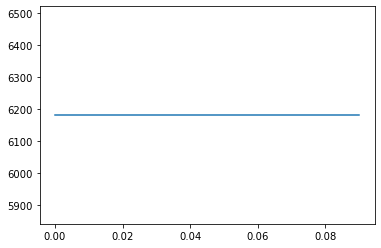

In [10]:
tol_ = pd.Series(de_tol)
tol_.plot()

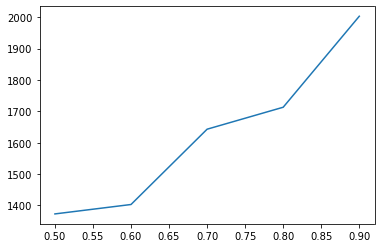

In [11]:
mutation_ = pd.Series(de_mutation)
mutation_.plot()

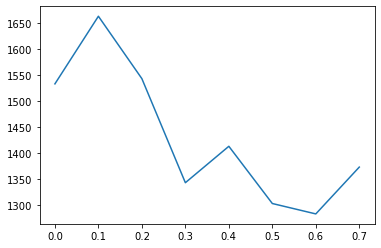

In [12]:
recombination_ = pd.Series(de_recombination)
recombination_.plot()

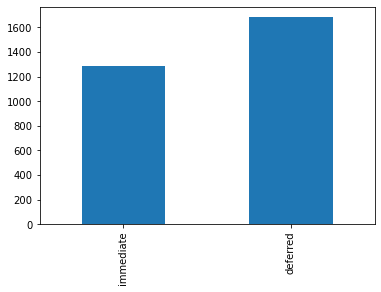

In [13]:
updating_ =  pd.Series(de_updating)
updating_.plot.bar()